In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
table = pd.read_excel("entropy_4.xlsx")

# A1

In [3]:
import math
def entropy(table):
    total_count = len(table)
    yes_count = len(table[table['buys_computer'] == 'yes'])
    no_count = len(table[table['buys_computer'] == 'no'])
    if yes_count == 0 or no_count == 0:
        return 0 

    p_yes = yes_count / total_count
    p_no = no_count / total_count

    entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
    return entropy

entropy_root = entropy(table)

def information_gain(table, attribute):
    unique_values = table[attribute].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = table[table[attribute] == value]
        weight = len(subset) / len(table)
        weighted_entropy += weight * entropy(subset)

    info_gain = entropy_root - weighted_entropy
    return info_gain

attributes = ['age', 'income', 'student', 'credit_rating']
info_gains = {attribute: information_gain(table, attribute) for attribute in attributes}

best_attribute = max(info_gains, key=info_gains.get)
print("Information Gains: \n", info_gains)
print("\nBest Attribute for Root Node:\n", best_attribute)

Information Gains: 
 {'age': 0.24674981977443933, 'income': 0.02922256565895487, 'student': 0.15183550136234159, 'credit_rating': 0.1299303895316022}

Best Attribute for Root Node:
 age


# A2

In [4]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer as ct
from sklearn.pipeline import Pipeline as ppl

table = pd.read_excel('entropy_4.xlsx')

X = table.drop(columns=['buys_computer'])
y = table ['buys_computer']

catg_col = ['age', 'income', 'student', 'credit_rating']

preprocessor = ct(
    transformers=[('cat', ohe(), catg_col)],
    remainder='passthrough' 
)

model = ppl([
    ('preprocessor', preprocessor),
    ('classifier', dtc())
])

model.fit(X, y)

tree_depth = model.named_steps['classifier'].get_depth()

print("Tree Depth:", tree_depth)

Tree Depth: 4


# A3

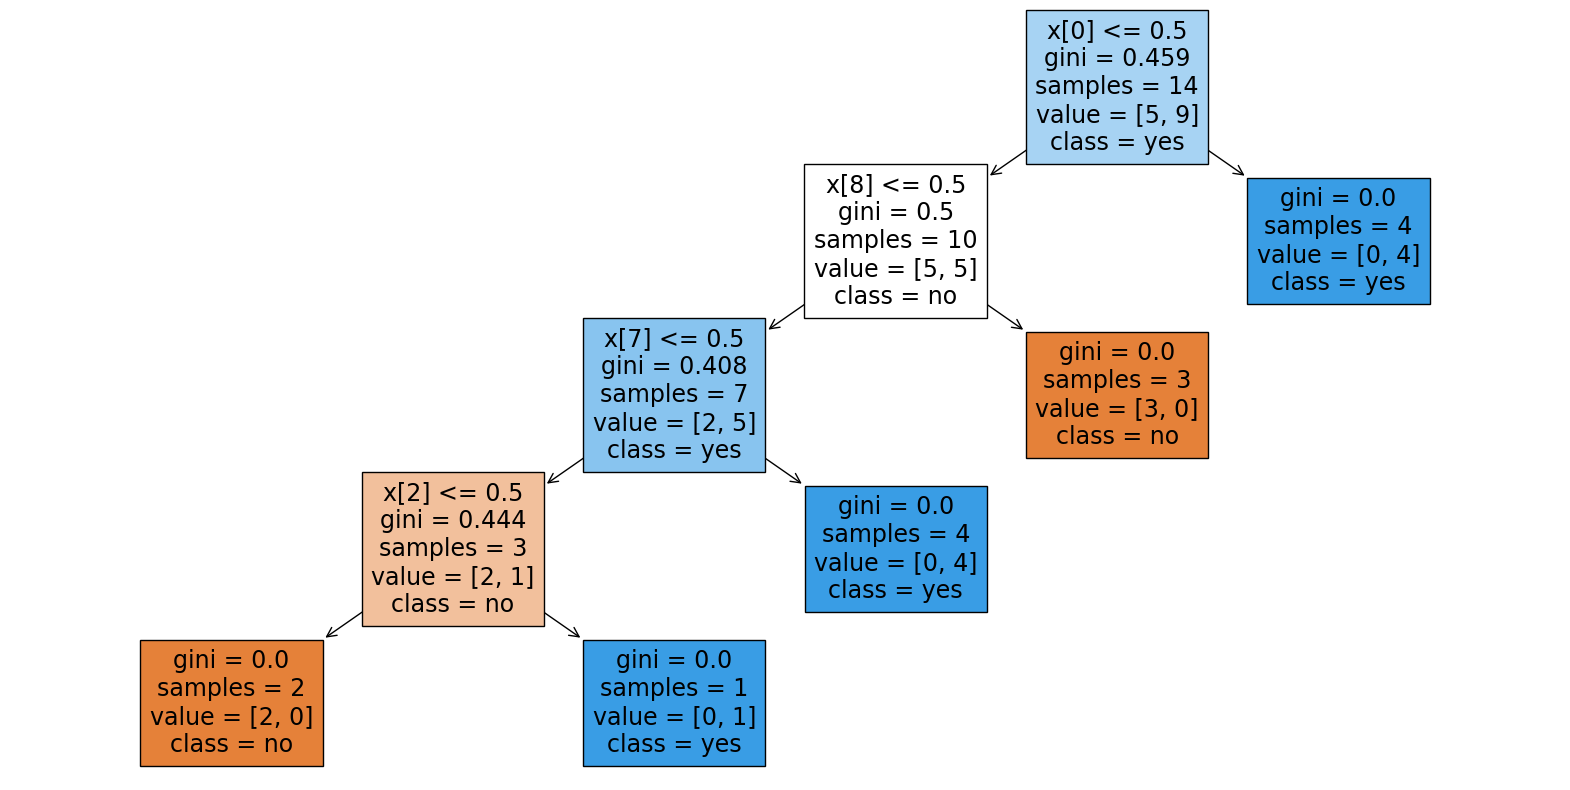

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model.named_steps['classifier'], filled=True, class_names=['no', 'yes'])
plt.show()

# A4

In [6]:
data = pd.read_csv("Train_data.csv")

In [7]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder as ohe

x = data.loc[:, "duration":"dst_host_srv_rerror_rate"]
y = data["class"]
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 0)

catg_cols = ["protocol_type", "service", "flag"]
encoder = ohe(sparse=False, drop='first')

x_train_encoded = encoder.fit_transform(x_train[catg_cols])
x_train = x_train.drop(columns = catg_cols)
x_train = np.hstack((x_train, x_train_encoded))

x_test_encoded = encoder.transform(x_test[catg_cols])
x_test = x_test.drop(columns = catg_cols)
x_test = np.hstack((x_test, x_test_encoded))

C:\Users\roosh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training data accuracy =  0.9999470731449137
Testing data accuracy =  0.9960304858685297


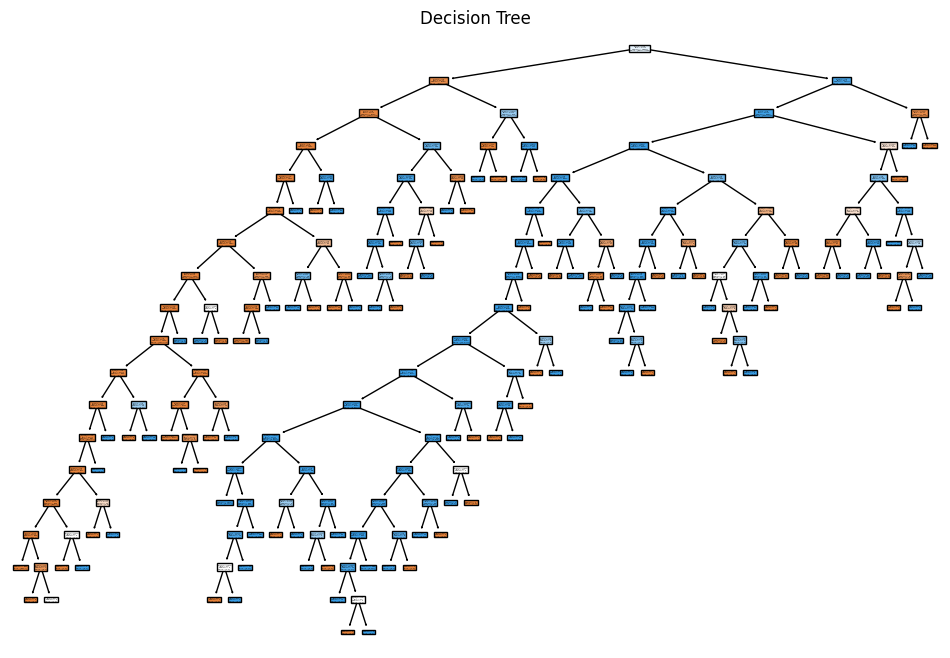

In [8]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

model = dtc()
model = model.fit(x_train,y_train)

print("Training data accuracy = ", model.score(x_train, y_train))
print("Testing data accuracy = ", model.score(x_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled = True)
plt.title("Decision Tree")
plt.show()

# A5

Training data accuracy =  0.9889382872869694
Testing data accuracy =  0.9887265798666244


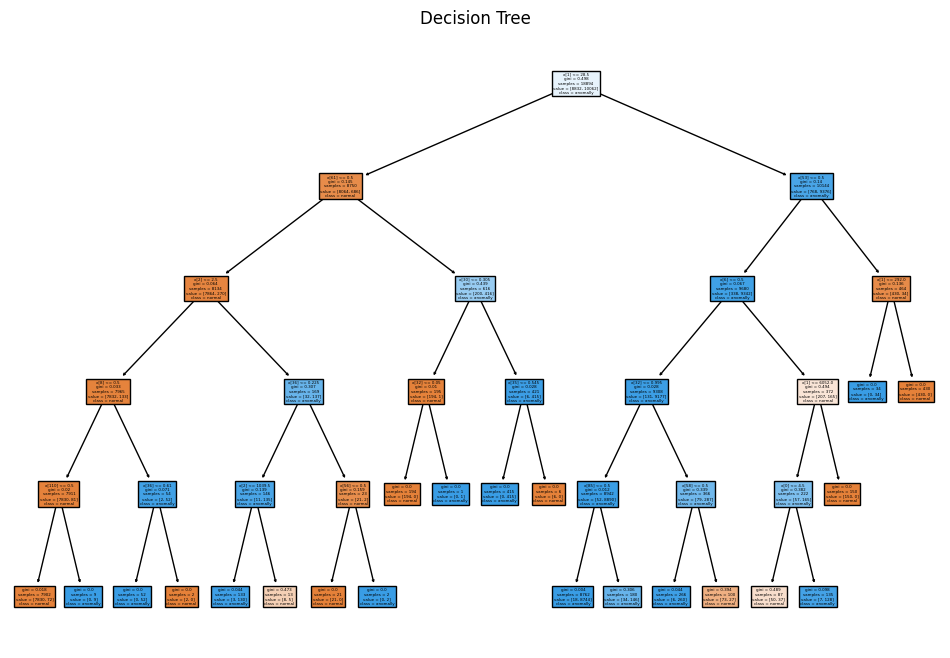

In [9]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree

model = dtc(max_depth = 5)
model = model.fit(x_train,y_train)

print("Training data accuracy = ", model.score(x_train, y_train))
print("Testing data accuracy = ", model.score(x_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled = True, class_names = ['normal', 'anomally'])
plt.title("Decision Tree")
plt.show()

# A6

Training Set Accuracy =  0.9999470731449137
Test Set Accuracy =  0.9961892664337885


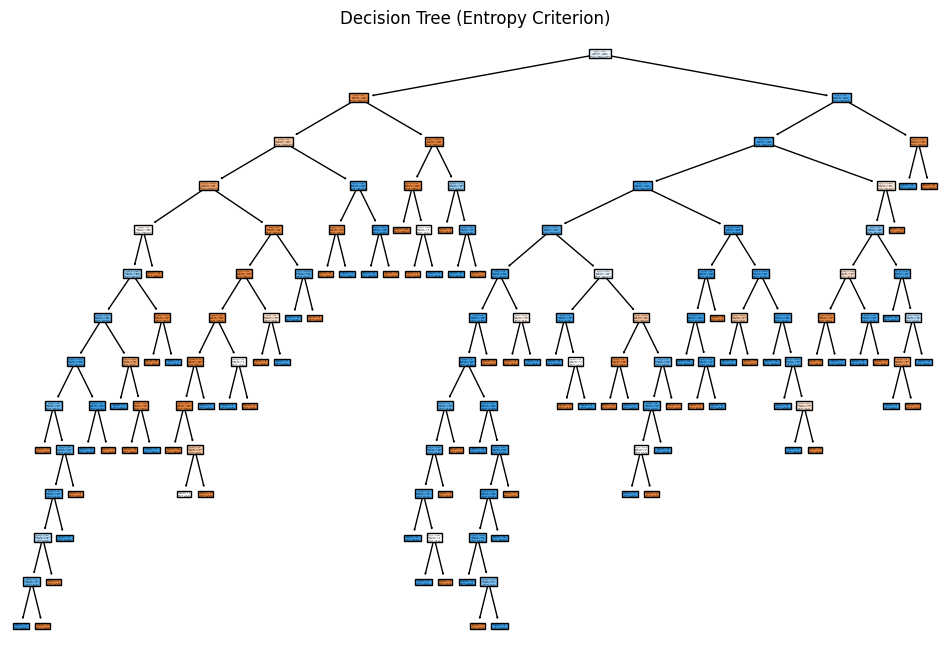

In [10]:
model_entropy = dtc(criterion="entropy")
model_entropy.fit(x_train, y_train)

print("Training Set Accuracy = ", model_entropy.score(x_train, y_train))
print("Test Set Accuracy = ", model_entropy.score(x_test, y_test))

plt.figure(figsize=(12, 8))
tree.plot_tree(model_entropy, filled=True, class_names = ['normal', 'anomally'])
plt.title("Decision Tree (Entropy Criterion)")
plt.show()

# A7

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

y_pred_dt = decision_tree.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label = 'anomaly')
recall_dt = recall_score(y_test, y_pred_dt, pos_label = 'anomaly')
f1_score_dt = f1_score(y_test, y_pred_dt, pos_label = 'anomaly')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_score_dt:.4f}")
confusion_matrix_train = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix_train)

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label = 'anomaly')
recall_rf = recall_score(y_test, y_pred_rf, pos_label = 'anomaly')
f1_score_rf = f1_score(y_test, y_pred_rf, pos_label = 'anomaly')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_score_rf:.4f}")
confusion_matrix_train = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix_train)

if ((precision_rf >= precision_dt) & (recall_rf >= recall_dt) & (f1_score_rf >= f1_score_dt) & (accuracy_rf >= accuracy_dt)):
    print("\n Random forest performance is better")
else:
    print("\n Decision tree performance is better.")

accuracy: 0.9965
Precision: 0.9972
Recall: 0.9952
F1-Score: 0.9962

Confusion Matrix (Train Data):
[[2897   14]
 [   8 3379]]
accuracy: 0.9971
Precision: 0.9979
Recall: 0.9959
F1-Score: 0.9969

Confusion Matrix (Train Data):
[[2899   12]
 [   6 3381]]

 Random forest performance is better


# A8